In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima
from pyramid.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\SOHINI\Desktop\sirp data.csv" , parse_dates=['Date'])
data

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,62561,7,2019-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,False,9,13867.46,B,70713
1,62576,7,2019-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,False,25,3794.74,B,70713
2,62577,7,2019-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,False,26,2060.87,B,70713
3,62578,7,2019-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,False,27,392.69,B,70713
4,62579,7,2019-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,False,28,77.50,B,70713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,315047,33,2018-07-16,100.14,2.971,0.0,0.0,0.0,0.0,0.0,126.149806,9.495,False,92,38401.64,A,39690
421566,315046,33,2018-07-16,100.14,2.971,0.0,0.0,0.0,0.0,0.0,126.149806,9.495,False,91,11488.44,A,39690
421567,315045,33,2018-07-16,100.14,2.971,0.0,0.0,0.0,0.0,0.0,126.149806,9.495,False,90,26533.36,A,39690
421568,315030,33,2018-07-16,100.14,2.971,0.0,0.0,0.0,0.0,0.0,126.149806,9.495,False,40,4337.10,A,39690


In [2]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SOHINI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


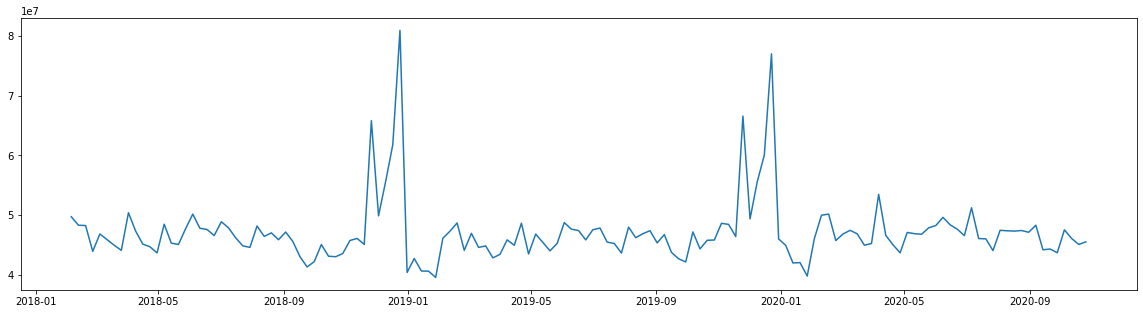

In [4]:
data_average_sales_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
data_average_sales = data_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(data_average_sales_week.Date, data_average_sales_week.Weekly_Sales)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts, orders):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_

    def predict_ar_model(ts, orders, coef, intercept):
        return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) 
    + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])
    return predict_ar_model()
    

In [26]:

    def predict_ar_model(ts, orders, coef, intercept):
        return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) 
    + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])
  
    

In [27]:
ts = data_average_sales_week.set_index('Date')

[[ 0.10934893 -0.02861279  0.81512715]] [5324365.82203197]
Score factor: 0.87


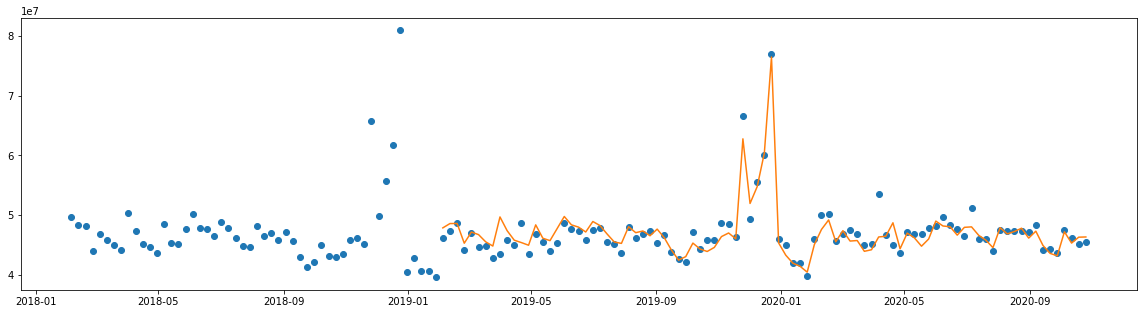

In [28]:
orders=np.array([1,6,52])
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred)
plt.show()

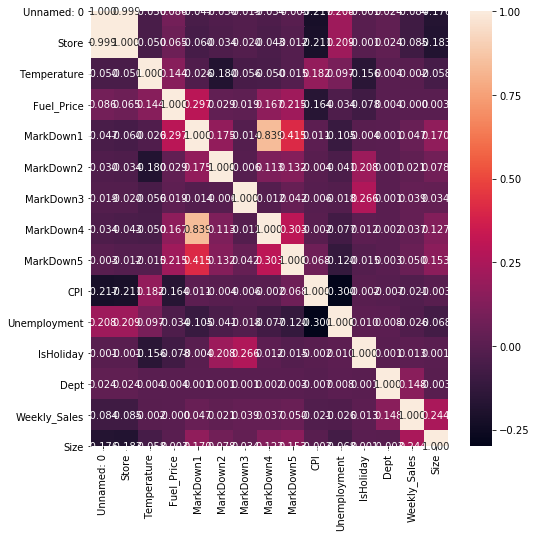

In [31]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

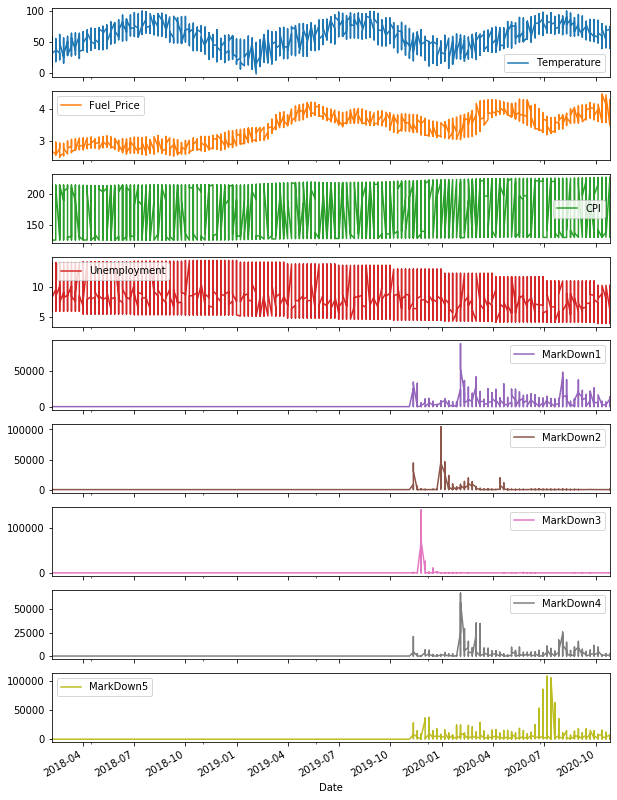

In [32]:
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(10,15))
plt.show()